In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import csv

import datetime
from datetime import date
import calendar


import numpy as np
from bokeh.io import show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
#from bokeh.sampledata.stocks import AAPL
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid
from bokeh.models.glyphs import Line

In [273]:
# numeros totales
# actividad por hora
# promedios por mes o por año

# palabras mas comunes del grupo
# palabras mas comunes por usuario
# palabras mas comunes por dia


# participacion en el grupo - cake

# dia mas activo
# cantidad de mensajes cronologicos por mes

# mas multimediero

In [432]:
#data = pd.read_csv("Whatsapp group chat.txt") 

#filename = 'MyFile.txt' 
fin=open("chat.txt",'r')
fin

<_io.TextIOWrapper name='chat.txt' mode='r' encoding='cp1252'>

In [433]:
with open('chat.txt', 'r', encoding="utf8") as myfile:
  data = myfile.read()
sentences = data.split('\n')  

In [450]:
sentences[220:230]

['16/3/16 16:06 - \u200eLobo cl cambió el asunto a "Ponelo al chamagol"',
 '16/3/16 16:42 - Oguitoo: Riti',
 '16/3/16 16:42 - Oguitoo: Tas por ahi?',
 '16/3/16 16:42 - Oguitoo: Si, me mudo a fin de mes',
 '16/3/16 16:42 - Oguitoo: A mansión narco en la ruta',
 '16/3/16 16:42 - Oguitoo: Con un amigo',
 '16/3/16 16:42 - Oguitoo: Riiiti',
 '16/3/16 16:42 - Oguitoo: Veni',
 'Hablemos del indio mago negro',
 '16/3/16 16:43 - Oguitoo: Y "sus misas"']

In [448]:
#for i in sentences[i]:
df = pd.DataFrame()
for i in range(1,225):

    date = sentences[i].split('-')[0].strip()
    usertext = sentences[i].split('-')[1].strip()
    user = usertext.split(':')[0].strip()
    text = usertext.split(':')[1].strip()

    try:
        date = sentences[i].split('-')[0].strip()
        usertext = sentences[i].split('-')[1].strip()
        user = usertext.split(':')[0].strip()
        text = usertext.split(':')[1].strip()

    except IndexError:
         date = None
         usertext = None
         user = None
         text = None
    
    
    
    serie = pd.Series([user, date, text, hour], index=['user', 'date', 'text', 'hour'])
    df = df.append(serie, ignore_index=True)

IndexError: list index out of range

In [412]:
#df.date = pd.to_datetime(df.date,format='%d/%m/%y')
df.date = pd.to_datetime(df.date,format='%d/%m/%y %H:%M')
df['week'] = df.date.dt.week
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['weekdaynr'] = df.date.dt.weekday
df['hour'] = df.date.dt.hour
df['date3'] = df.date.dt.date


#calendar.day_name[my_date.weekday()]

In [310]:
weekdaynames = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
#df['weekday'] = weekDays[df['weekday']]

#df['weekday'] = df['weekday'].apply(lambda x: weekDays[df['weekday']])
df['weekday'] = df['weekdaynr'].apply(lambda x: weekDays[x])
df.sample(3)

,date,hour,text,user,week,year,month,weekdaynr,date3,weekday
19,2016-03-12 18:57:00,18,"Tonces somos Nico, Iña y el lobo? En media com...",Uba Cl,10,2016,3,5,2016-03-12,Sabado
55,2016-03-13 19:52:00,19,para servirte,Lobo cl,10,2016,3,6,2016-03-13,Domingo
41,2016-03-13 01:04:00,1,Es dura e,Sebi Cell,10,2016,3,6,2016-03-13,Domingo


In [390]:
df_graph1.sample(3)

,date,hour,text,user,week,year,month,weekdaynr,weekday
date3,,,,,,,,,
2016-03-13,61,61,61,61,61,61,61,61,61
2016-03-12,37,37,37,37,37,37,37,37,37
2016-03-11,1,1,1,1,1,1,1,1,1


In [399]:
dates[3]

IndexError: index 3 is out of bounds for axis 0 with size 3

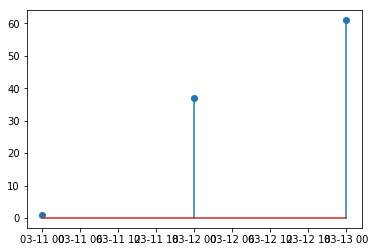

In [406]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib.pyplot as plt
import numpy as np

x = df_graph1.index
y = df_graph1.text

plt.stem(x, y)
plt.show()

In [381]:
import numpy as np

from bokeh.io import show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from bokeh.sampledata.stocks import AAPL

dates = np.array(AAPL['date'], dtype=np.datetime64)
source = ColumnDataSource(data=dict(date=dates, close=AAPL['adj_close']))

p = figure(plot_height=300, plot_width=800, tools="xpan", toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           background_fill_color="#efefef", x_range=(dates[1500], dates[2500]))

p.line('date', 'close', source=source)
p.yaxis.axis_label = 'Price'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                plot_height=130, plot_width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

select.line('date', 'close', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)
select.toolbar.active_multi = range_tool

show(column(p, select))

In [382]:
dates[1500]

numpy.datetime64('2006-02-17')